In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/My Drive/python/Capabl'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv(path+'/train.csv')

In [ ]:
df.shape

(1458644, 11)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [ ]:
df['trip_duration'].describe().apply(lambda x: format(x, 'f'))

count    1458644.000000
mean         959.492273
std         5237.431724
min            1.000000
25%          397.000000
50%          662.000000
75%         1075.000000
max      3526282.000000
Name: trip_duration, dtype: object

Data Exploration

In [ ]:
df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

(array([6.00000e+01, 1.03354e+06, 2.10318e+05, 5.98960e+04, 2.84040e+04,
        7.80880e+04, 4.83330e+04, 3.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

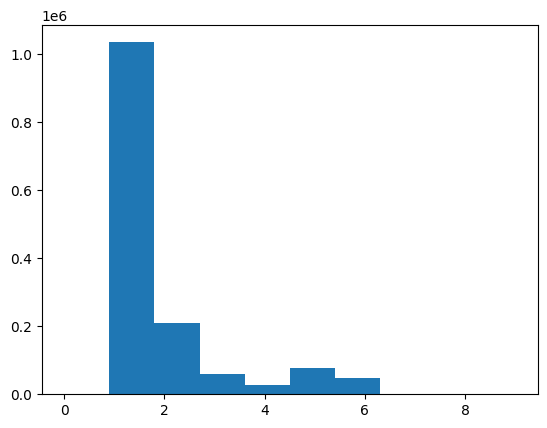

In [ ]:
plt.hist(df['passenger_count'])

1    0.708562
2    0.144187
5    0.053535
3    0.041063
6    0.033136
4    0.019473
0    0.000041
7    0.000002
9    0.000001
8    0.000001
Name: passenger_count, dtype: object


<Axes: ylabel='passenger_count'>

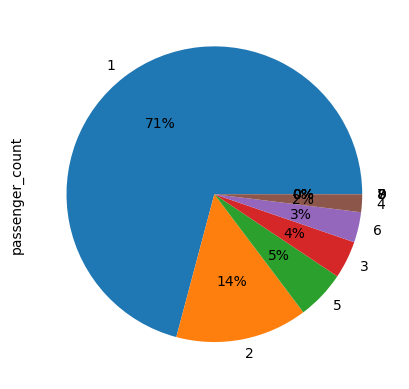

In [ ]:
print(df['passenger_count'].value_counts(normalize=True).apply(lambda x: format(x, 'f')))
df['passenger_count'].value_counts().plot(kind="pie", autopct='%1.0f%%')

In [ ]:
df = df[~((df['passenger_count'] == 0) | (df['passenger_count'] > 5))]

In [ ]:
df['passenger_count'].value_counts().sort_index()

1    1033540
2     210318
3      59896
4      28404
5      78088
Name: passenger_count, dtype: int64

<Axes: >

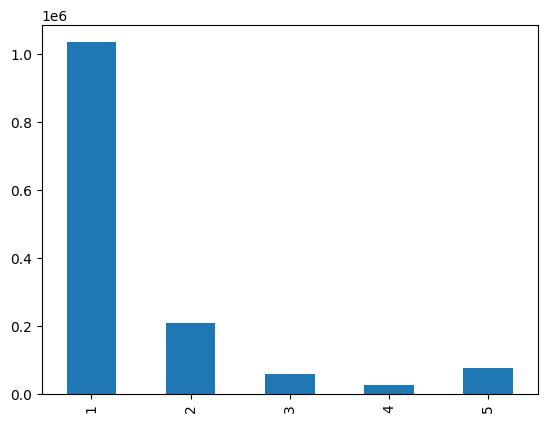

In [ ]:
df['passenger_count'].value_counts().sort_index().plot(kind="bar")

1    0.732879
2    0.149136
5    0.055372
3    0.042472
4    0.020141
Name: passenger_count, dtype: object


<Axes: ylabel='passenger_count'>

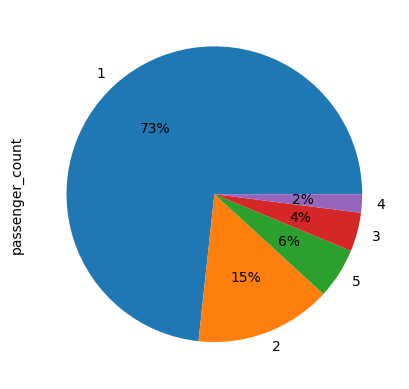

In [ ]:
print(df['passenger_count'].value_counts(normalize=True).apply(lambda x: format(x, 'f')))
df['passenger_count'].value_counts().plot(kind="pie", autopct='%1.0f%%')

N    1402204
Y       8042
Name: store_and_fwd_flag, dtype: int64


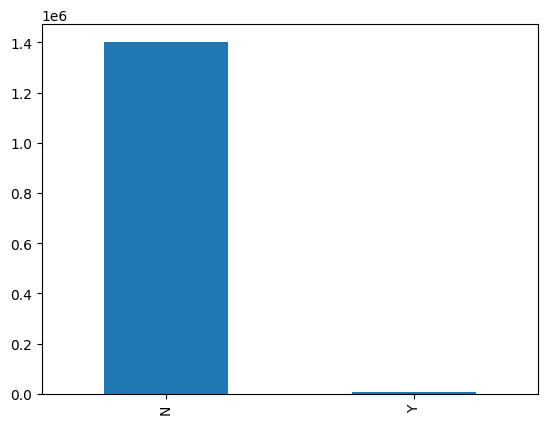

In [ ]:
df['store_and_fwd_flag'].value_counts().plot(kind="bar")
print(df['store_and_fwd_flag'].value_counts())

2    732087
1    678159
Name: vendor_id, dtype: int64


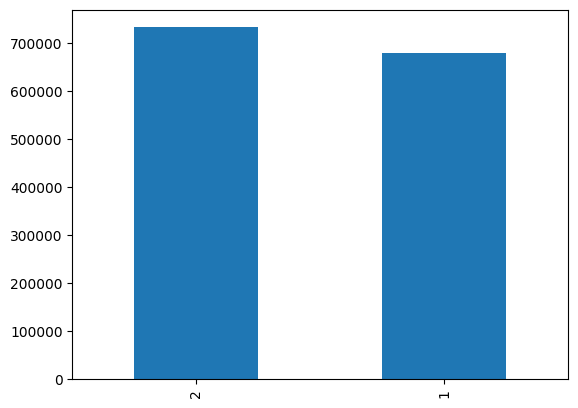

In [ ]:
df['vendor_id'].value_counts().plot(kind="bar")
print(df['vendor_id'].value_counts())

<Axes: ylabel='vendor_id'>

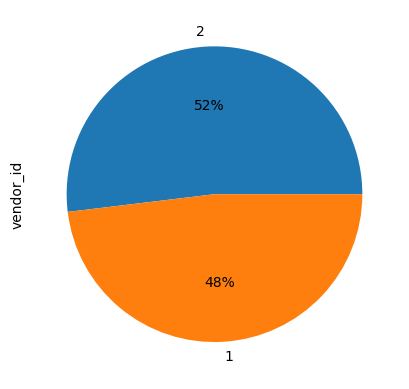

In [ ]:
df['vendor_id'].value_counts().plot(kind="pie", autopct='%1.0f%%')

In [ ]:
import seaborn as sns

<Axes: xlabel='passenger_count', ylabel='trip_duration'>

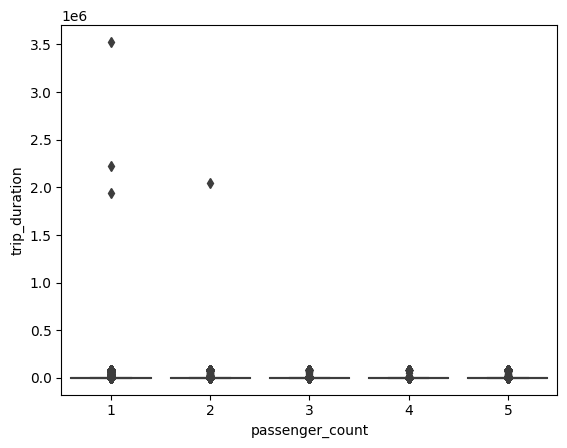

In [ ]:
sns.boxplot(x=df['passenger_count'],y=df['trip_duration'])

In [ ]:
Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5 * IQR
higher = Q3 + 1.5 * IQR
df = df[~((df['trip_duration'] < lower) | (df['trip_duration'] > higher))]

<Axes: xlabel='passenger_count', ylabel='trip_duration'>

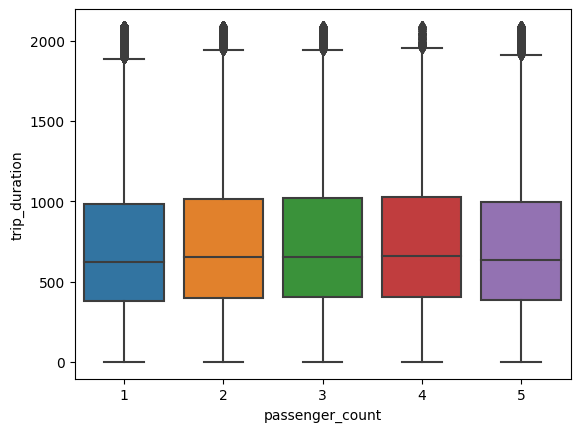

In [ ]:
sns.boxplot(x=df['passenger_count'],y=df['trip_duration'])

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338558 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1338558 non-null  object        
 1   vendor_id           1338558 non-null  int64         
 2   pickup_datetime     1338558 non-null  datetime64[ns]
 3   dropoff_datetime    1338558 non-null  datetime64[ns]
 4   passenger_count     1338558 non-null  int64         
 5   pickup_longitude    1338558 non-null  float64       
 6   pickup_latitude     1338558 non-null  float64       
 7   dropoff_longitude   1338558 non-null  float64       
 8   dropoff_latitude    1338558 non-null  float64       
 9   store_and_fwd_flag  1338558 non-null  object        
 10  trip_duration       1338558 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.5+ MB


In [ ]:
df['day'] = df['pickup_datetime'].dt.day_name()
df['month'] = df['pickup_datetime'].dt.month
df['weekday_num'] = df['pickup_datetime'].dt.weekday
df['pickup_hour'] = df['pickup_datetime'].dt.hour

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338558 entries, 0 to 1458643
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1338558 non-null  object        
 1   vendor_id           1338558 non-null  int64         
 2   pickup_datetime     1338558 non-null  datetime64[ns]
 3   dropoff_datetime    1338558 non-null  datetime64[ns]
 4   passenger_count     1338558 non-null  int64         
 5   pickup_longitude    1338558 non-null  float64       
 6   pickup_latitude     1338558 non-null  float64       
 7   dropoff_longitude   1338558 non-null  float64       
 8   dropoff_latitude    1338558 non-null  float64       
 9   store_and_fwd_flag  1338558 non-null  object        
 10  trip_duration       1338558 non-null  int64         
 11  day                 1338558 non-null  object        
 12  month               1338558 non-null  int64         
 13  weekday_num 

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day,month,weekday_num,pickup_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,3,0,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,6,6,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,4,2,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,3,5,13
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,Friday,6,4,22


In [ ]:
print(df['dropoff_datetime'] - df['pickup_datetime'])

0         0 days 00:07:35
1         0 days 00:11:03
3         0 days 00:07:09
4         0 days 00:07:15
6         0 days 00:05:41
                ...      
1458639   0 days 00:12:58
1458640   0 days 00:10:55
1458641   0 days 00:12:44
1458642   0 days 00:06:13
1458643   0 days 00:03:18
Length: 1338558, dtype: timedelta64[ns]


In [ ]:
(df['trip_duration'] - (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds()).value_counts()

0.0    1338558
dtype: int64

In [ ]:
df.drop(['dropoff_datetime'], axis=1, inplace=True)

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day,month,weekday_num,pickup_hour
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,3,0,17
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,6,6,0
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,4,2,19
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,3,5,13
6,id1813257,1,2016-06-17 22:34:59,4,-73.969017,40.757839,-73.957405,40.765896,N,341,Friday,6,4,22


Trip per month
1    212770
2    221312
3    236459
4    230674
5    225317
6    212026
Name: month, dtype: int64


<Axes: >

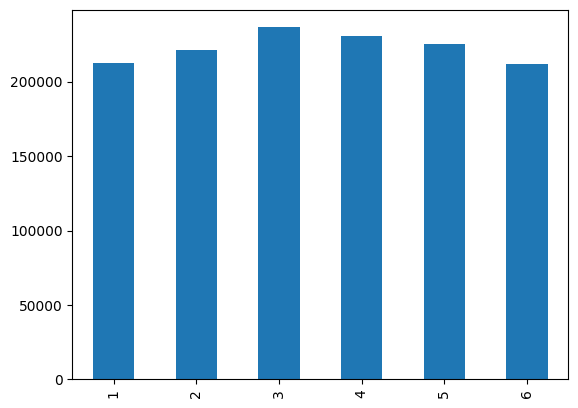

In [ ]:
print("Trip per month")
print(df['month'].value_counts().sort_index())
df['month'].value_counts().sort_index().plot(kind="bar")

Trip per week


<Axes: xlabel='day', ylabel='count'>

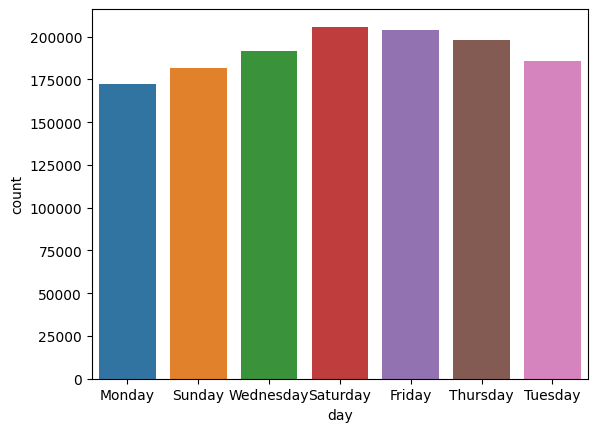

In [ ]:
print("Trip per week")
sns.countplot(x='day', data=df)

Trip per week


<Axes: xlabel='weekday_num', ylabel='count'>

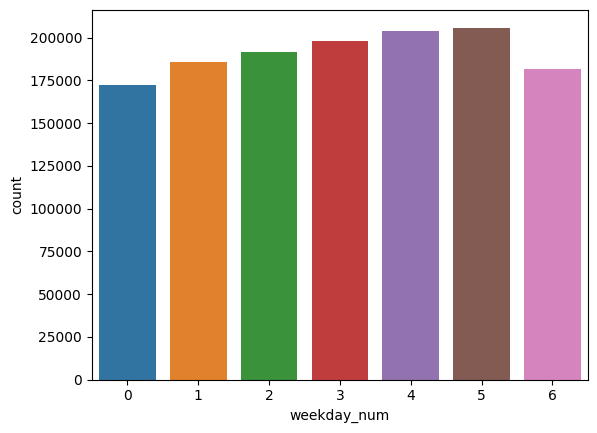

In [ ]:
print("Trip per week")
sns.countplot(x='weekday_num', data=df)

<ipython-input-38-0636fb6d0c40>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pickup_hour'])


<Axes: xlabel='pickup_hour', ylabel='Density'>

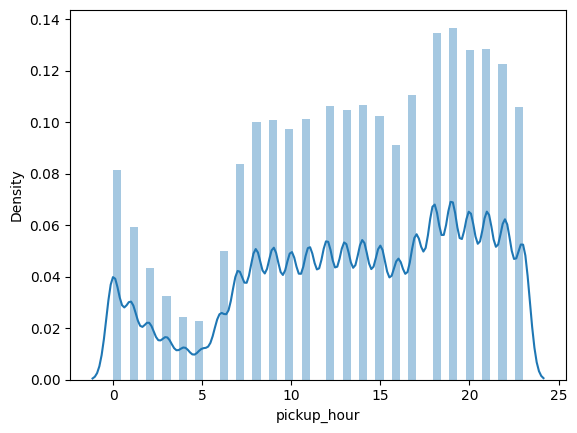

In [ ]:
sns.distplot(df['pickup_hour'])

In [ ]:
from geopy.distance import geodesic

In [ ]:
geodesic((df['pickup_latitude'].iloc[0],df['pickup_longitude'].iloc[0]),(df['dropoff_latitude'].iloc[0],df['dropoff_longitude'].iloc[0])).km

1.5021718368830568

In [ ]:
  distance = []
  for i in range(len(df['pickup_latitude'])):
      distance.append(geodesic((df['pickup_latitude'].iloc[i],df['pickup_longitude'].iloc[i]),(df['dropoff_latitude'].iloc[i],df['dropoff_longitude'].iloc[i])).km)
  df['distance'] = distance

In [ ]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,day,month,weekday_num,pickup_hour,distance
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,3,0,17,1.502172
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,6,6,0,1.808660
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,4,2,19,1.483632
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,3,5,13,1.187038
6,id1813257,1,2016-06-17 22:34:59,4,-73.969017,40.757839,-73.957405,40.765896,N,341,Friday,6,4,22,1.327329


<Axes: xlabel='distance', ylabel='trip_duration'>

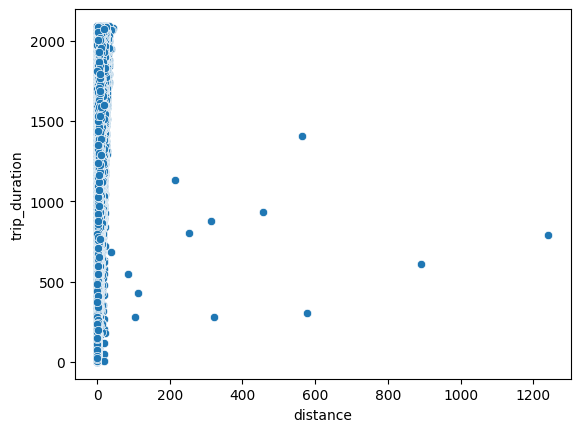

In [ ]:
sns.scatterplot(x=df['distance'],y=df['trip_duration'])

<ipython-input-44-c64264c002b5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['distance'])


<Axes: xlabel='distance', ylabel='Density'>

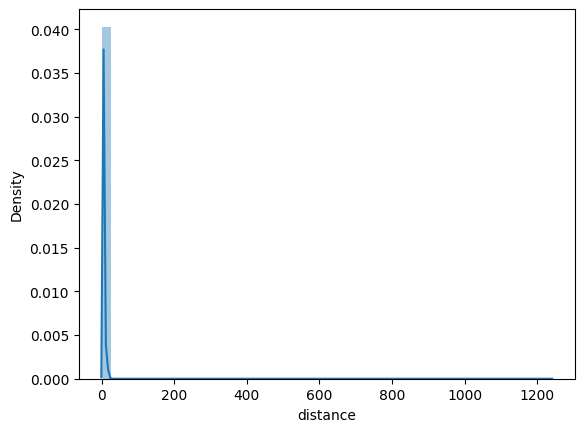

In [ ]:
sns.distplot(df['distance'])

<ipython-input-45-148c071d6dcd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['distance'][df['distance'] < 30])


<Axes: xlabel='distance', ylabel='Density'>

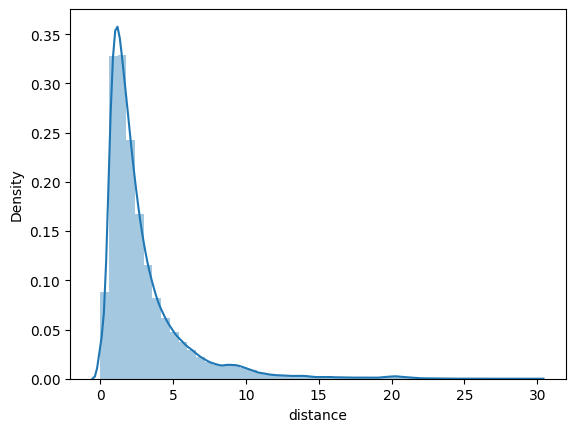

In [ ]:
sns.distplot(df['distance'][df['distance'] < 30])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a3aa7925030>,
 'caps': [<matplotlib.lines.Line2D at 0x7a3aa7925570>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a3aa7924d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7a3aa7925ab0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a3aa85a65c0>],
 'means': []}

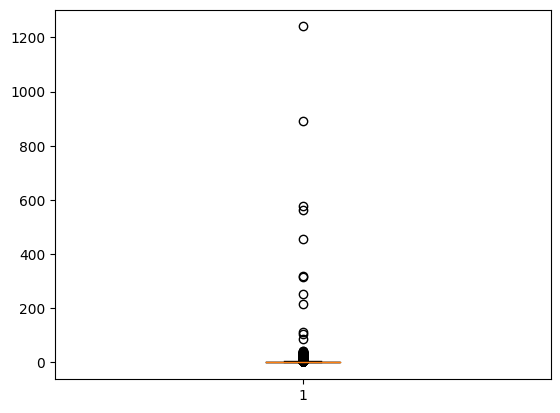

In [ ]:
plt.boxplot(df['distance'])

In [ ]:
df['distance'][df['distance'] > 100].value_counts()

1240.510256    1
314.260625     1
112.829898     1
320.445202     1
105.023359     1
253.987879     1
578.579744     1
563.028024     1
891.663777     1
456.364941     1
215.511294     1
Name: distance, dtype: int64

In [ ]:
df['distance'].describe().apply(lambda x: format(x, 'f'))

count    1338558.000000
mean           2.913828
std            3.308473
min            0.000000
25%            1.199068
50%            1.994089
75%            3.487371
max         1240.510256
Name: distance, dtype: object

In [ ]:
len(df[df['distance'] == 0])

5509

In [ ]:
df['year'] = df['pickup_datetime'].dt.year

In [ ]:
df['year'].value_counts()

2016    1338558
Name: year, dtype: int64

<Axes: xlabel='year', ylabel='count'>

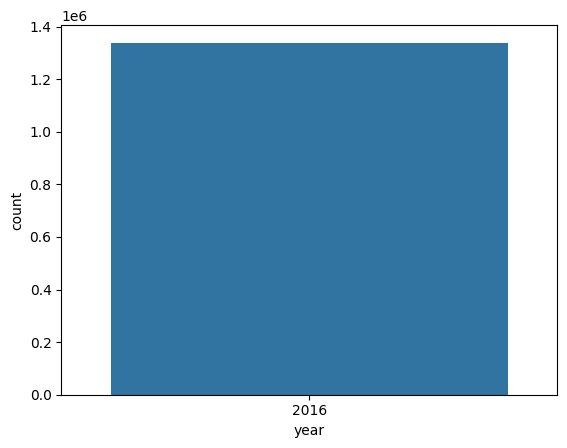

In [ ]:
sns.countplot(x='year',data=df)

In [ ]:
df.drop('day', axis=1, inplace=True)

In [ ]:
df.drop('year', axis=1, inplace=True)

In [ ]:
df = pd.get_dummies(df,columns=['vendor_id','store_and_fwd_flag'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338558 entries, 0 to 1458643
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   id                    1338558 non-null  object        
 1   pickup_datetime       1338558 non-null  datetime64[ns]
 2   passenger_count       1338558 non-null  int64         
 3   pickup_longitude      1338558 non-null  float64       
 4   pickup_latitude       1338558 non-null  float64       
 5   dropoff_longitude     1338558 non-null  float64       
 6   dropoff_latitude      1338558 non-null  float64       
 7   trip_duration         1338558 non-null  int64         
 8   month                 1338558 non-null  int64         
 9   weekday_num           1338558 non-null  int64         
 10  pickup_hour           1338558 non-null  int64         
 11  distance              1338558 non-null  float64       
 12  vendor_id_1           1338558 non-null  ui

<ipython-input-62-665aec29784f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

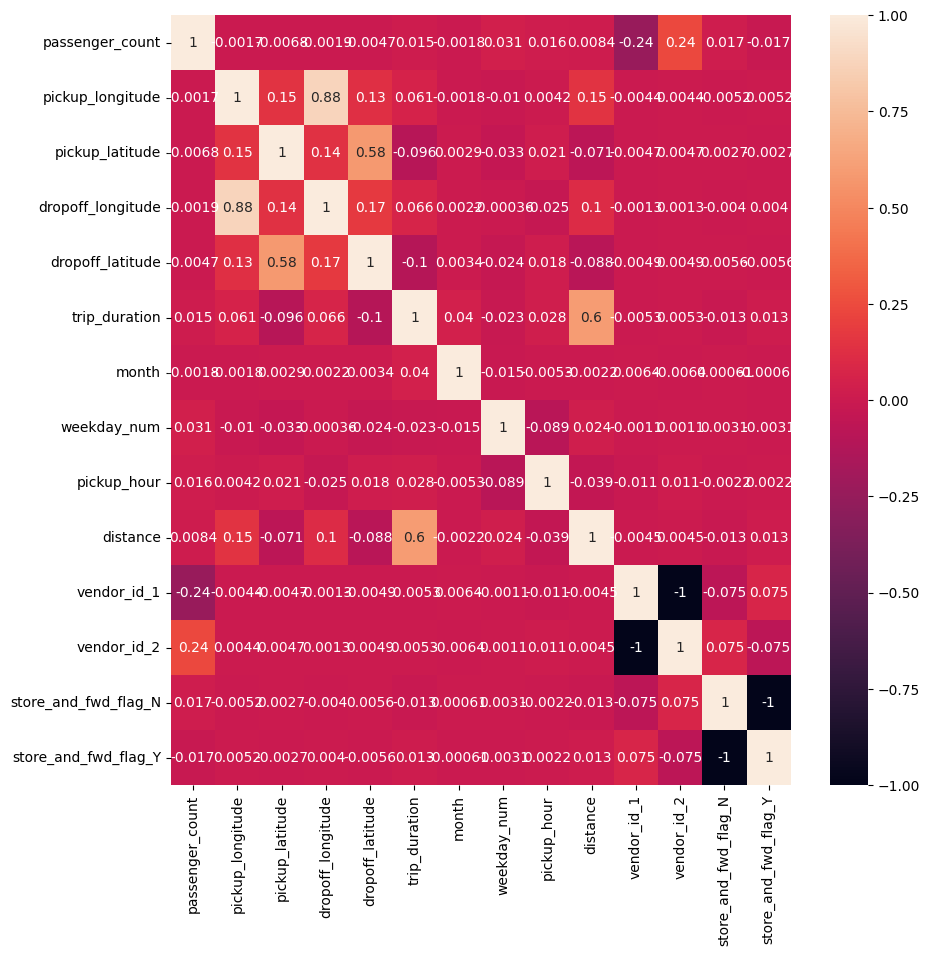

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

In [ ]:
test_df = pd.read_csv(path+'/test.csv')

In [ ]:
test_df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')

Modelling

In [ ]:
df.columns

Index(['id', 'pickup_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'trip_duration', 'month', 'weekday_num', 'pickup_hour', 'distance',
       'vendor_id_1', 'vendor_id_2', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y'],
      dtype='object')

In [ ]:
columns_to_drop = ['id', 'pickup_datetime','pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

In [ ]:
scale_column = ['passenger_count','month', 'weekday_num', 'pickup_hour', 'distance']

In [ ]:
not_scale_columns = ['vendor_id_1', 'vendor_id_2', 'store_and_fwd_flag_N','store_and_fwd_flag_Y']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
Y = df['trip_duration']
X = df.drop('trip_duration',axis=1)

In [ ]:
X = X.drop(columns_to_drop,axis=1)

In [ ]:
X.columns

Index(['passenger_count', 'month', 'weekday_num', 'pickup_hour', 'distance',
       'vendor_id_1', 'vendor_id_2', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X[scale_column] = scaler.fit_transform(X[scale_column])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338558 entries, 0 to 1458643
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   passenger_count       1338558 non-null  float64
 1   month                 1338558 non-null  float64
 2   weekday_num           1338558 non-null  float64
 3   pickup_hour           1338558 non-null  float64
 4   distance              1338558 non-null  float64
 5   vendor_id_1           1338558 non-null  uint8  
 6   vendor_id_2           1338558 non-null  uint8  
 7   store_and_fwd_flag_N  1338558 non-null  uint8  
 8   store_and_fwd_flag_Y  1338558 non-null  uint8  
dtypes: float64(5), uint8(4)
memory usage: 66.4 MB


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=31)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1070846, 9) (1070846,)
(267712, 9) (267712,)


In [ ]:
'trip_duration' in X.columns

False

In [ ]:
Y

0          455
1          663
3          429
4          435
6          341
          ... 
1458639    778
1458640    655
1458641    764
1458642    373
1458643    198
Name: trip_duration, Length: 1338558, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score = lr.score(X_train, y_train)
lr_train_score

0.3483352016438638

In [ ]:
lr_test_score = lr.score(X_test, y_test)
lr_test_score

0.4249357782699188

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
rmse = mean_squared_error(y_test,y_pred,squared=False)
rmse

339.95843585037585

In [ ]:
r2 = r2_score(y_test,y_pred)
r2

0.4249357782699188

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso_0001 = Lasso(alpha=0.0001,max_iter=int(1e5))
lasso_0001.fit(X_train,y_train)
lasso_0001_train_score = lasso_0001.score(X_train, y_train)
print(lasso_0001_train_score)
print("Selected coeff:", np.sum(lasso_0001.coef_!= 0))

0.3483356761745229
Selected coeff: 9


In [ ]:
lasso_001 = Lasso(alpha=0.001,max_iter=int(1e5))
lasso_001.fit(X_train,y_train)
lasso_001_train_score = lasso_001.score(X_train, y_train)
print(lasso_001_train_score)
print("Selected coeff:", np.sum(lasso_001.coef_!= 0))

0.3483356751665444
Selected coeff: 7


In [ ]:
lasso_1 = Lasso(alpha=1,max_iter=int(1e5))
lasso_1.fit(X_train,y_train)
lasso_1_train_score = lasso_1.score(X_train, y_train)
print(lasso_1_train_score)
print("Selected coeff:", np.sum(lasso_1.coef_!= 0))

0.348280443964607
Selected coeff: 5


In [ ]:
lasso_10 = Lasso(alpha=10,max_iter=int(1e5))
lasso_10.fit(X_train,y_train)
lasso_10_train_score = lasso_10.score(X_train, y_train)
print(lasso_10_train_score)
print("Selected coeff:", np.sum(lasso_10.coef_!= 0))

0.34625918168111014
Selected coeff: 4


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [ ]:
dtr = DecisionTreeRegressor(random_state=31)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=31)

In [ ]:
dtr_train_score = dtr.score(X_train, y_train)
dtr_train_score

0.9983894058603949

In [ ]:
dtr_test_score = dtr.score(X_test,y_test)
dtr_test_score

0.30441053362438797

In [ ]:
max_depth = [4,6,8,10]
min_samples_split = [10,20,30]
min_samples_leaf = [10,16,20]
param_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
dtmodel = DecisionTreeRegressor()
dt_grid = GridSearchCV(estimator=dtmodel,
                       param_grid = param_dt,
                       cv = 5, verbose=2, scoring='r2')

dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   2.1s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   2.0s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   2.2s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   1.8s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time=   1.8s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   2.3s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   2.6s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   1.7s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   1.6s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time=   1.8s
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=30; total time=   1.8s
[CV] END max_d

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [10, 16, 20],
                         'min_samples_split': [10, 20, 30]},
             scoring='r2', verbose=2)

In [ ]:
dt_grid.best_score_

0.6582805816569899

In [ ]:
dt_optimal_model = dt_grid.best_estimator_

In [ ]:
dt_optimal_model.score(X_test,y_test)

0.6587428312675909

In [ ]:
y_pred_dto_test=dt_optimal_model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred_dto_test,squared=False)

261.88374322926035

In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.09185e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.0971e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.09185e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.0971e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [ ]:
ridge_regressor.score(X_test,y_test)

0.42504924278625533

In [ ]:
ridge_regressor.best_params_

{'alpha': 100}

In [ ]:
ridge_regressor.best_estimator_.score(X_test,y_test)

0.42504924278625533

In [ ]:
n_estimators = [50,100,120]
max_depth = [5,7,9]
param_xgb = {
    'n_estimators' : n_estimators,
    'max_depth' : max_depth
}

In [ ]:
xgb_model = XGBRegressor()
xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = param_xgb,cv = 3, verbose=2,scoring="r2")
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


KeyboardInterrupt: ignored

In [ ]:
xgb_optimal_model = xgb_grid.best_estimator_
xgb_optimal_model.score(X_test,y_test)

In [ ]:
n_estimators = [50,100,120]
max_depth = [5,7,9]
min_samples_split = [40,50]
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_split':min_samples_split
              }

In [ ]:
xgb_model = XGBRegressor()
xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = param_xgb,cv = 3, verbose=2,scoring="r2")
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[02:15:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



KeyboardInterrupt: ignored

In [ ]:
xgb_optimal_model = xgb_grid.best_estimator_
xgb_optimal_model.score(X_test,y_test)

0.6662572042216606

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
n_estimators = [100,120]
max_depth = [5,8,10]
min_samples_split = [50,80]
min_samples_leaf = [40,50]
param_gb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
gb_model=GradientBoostingRegressor()
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_gb,
                       cv = 3, verbose=2, scoring='r2')
gb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time= 2.2min
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time= 2.3min
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time= 2.2min
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time= 2.6min
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time= 2.6min
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=50, n_estimators=120; total time= 2.7min
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time= 2.2min
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time= 2.2min
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=80, n_estimators=100; total time= 2.3min
[CV] END max_depth=5,

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [5, 8, 10], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 80],
                         'n_estimators': [100, 120]},
             scoring='r2', verbose=2)

In [ ]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=50,
                          min_samples_split=50)

In [ ]:
gb_optimal_model = gb_grid.best_estimator_
gb_optimal_model.score(X_test,y_test)

0.6668812240699227

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rf.score(X_test,y_test)

0.6152319629687303

In [ ]:
max_depth = [6,8,10]
min_samples_split = [10,20]
min_samples_leaf = [10,16]
param_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
rfmodel = RandomForestRegressor()
rf_grid = GridSearchCV(estimator=rfmodel,
                       param_grid = param_dt,
                       cv = 5, verbose=2, scoring='r2')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time= 2.8min
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time= 2.7min
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time= 2.6min
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time= 2.6min
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=10; total time= 2.6min
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time= 2.6min
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time= 2.6min
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time= 2.6min
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time= 2.6min
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=20; total time= 2.6min
[CV] END max_depth=4, min_samples_leaf=10, min_samples_split=30; total time= 2.6min
[CV] END max_d

In [ ]:
rf_grid.best_estimator_

In [ ]:
rf_optimal_model = rf_grid.best_estimator_
rf_optimal_model.score(X_test,y_test)

In [ ]:
rf_y_pred = rf_optimal_model.predict(X_test)
print(y_test, rf_y_pred)